# Handwritten Digit Recognition
## Using 5 layer neural network 
### Activation function: RELU  
### Learning rate: constant 

In [2]:
# including helper file to use some handy functions
import os
helper_file = os.getcwd() + '\\helpers.ipynb'
%run $helper_file

# importing needed libraries
import numpy as np
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [4]:
# parameters
LEARNING_RATES = [0.03, 0.01, 0.007, 0.003, 0.001, 0.0005]
BATCH_SIZE = 100
ITERATION_COUNT = 10000
ACCURACY_CHECK = 100

In [5]:
def train(mnist_data, batch_size, iteration_count, accuracy_check, learning_rate):
    
    image_width  = 28
    image_height = 28
    
    C0 = 1   # input channel count
    C1 = 200 # convolutional network channel 1 count 
    C2 = 100 # convolutional network channel 2 count
    C3 = 60  # convolutional network channel 3 count
    C4 = 30  # fulley connected layer size
    C5 = 10  # output count (digit count 0 to 9)
    
    # weights
    W1 = tf.Variable(tf.truncated_normal([image_width * image_height, C1], stddev = 0.1)) 
    W2 = tf.Variable(tf.truncated_normal([C1, C2], stddev = 0.1))
    W3 = tf.Variable(tf.truncated_normal([C2, C3], stddev = 0.1))
    W4 = tf.Variable(tf.truncated_normal([C3, C4], stddev = 0.1))
    W5 = tf.Variable(tf.truncated_normal([C4, C5], stddev = 0.1))
    
    # biases
    B1 = tf.Variable(tf.ones([C1]) / 10)
    B2 = tf.Variable(tf.ones([C2]) / 10)
    B3 = tf.Variable(tf.ones([C3]) / 10)
    B4 = tf.Variable(tf.ones([C4]) / 10)
    B5 = tf.Variable(tf.zeros([C5]))
    
    # model
    X  = tf.placeholder(tf.float32, shape=[None, image_width * image_height])
    Y1 = tf.nn.relu(tf.matmul(X , W1) + B1)
    Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
    Y3 = tf.nn.relu(tf.matmul(Y2, W3) + B3)
    Y4 = tf.nn.relu(tf.matmul(Y3, W4) + B4)
    Ylogits = tf.matmul(Y4, W5) + B5
    Y = tf.nn.softmax(Ylogits)
    
    # placeholder for correct answers
    Y_ = tf.placeholder(tf.float32, [None, C5])
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
    cross_entropy = tf.reduce_mean(cross_entropy) * 100
    
    # accuracy of the trained model, between 0 (worst) and 1 (best)
    correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

    # initialisation
    init = tf.global_variables_initializer()

    # start computation
    sess = tf.Session()
    sess.run(init)
    
    # preparing return values
    counter = 0 
    upper_bound = int(iteration_count / accuracy_check)
    iterations = np.arange(0, upper_bound)
    train_accuracy = np.zeros(upper_bound)
    train_loss = np.zeros(upper_bound)
    test_accuracy = np.zeros(upper_bound)
    test_loss = np.zeros(upper_bound)
    
    for i in range(iteration_count):
        
        # load batch of images and correct answers
        batch_X , batch_Y = mnist_data.train.next_batch(batch_size)
        train_data = {X: batch_X, Y_: batch_Y}
        
        # train
        sess.run(train_step, feed_dict = train_data)
        
        if i % accuracy_check == 0:
            
            a , c = sess.run([accuracy, cross_entropy], feed_dict = train_data)
            train_accuracy[counter] = a
            train_loss[counter] = c
            
            test_data = {X: mnist_data.test.images, Y_: mnist_data.test.labels}
            pred, a , c = sess.run([Y, accuracy, cross_entropy], feed_dict = test_data)
            
            predictions = tf.argmax(pred,1).eval(session=sess)
           
            test_accuracy[counter] = a
            test_loss[counter] = c
            counter += 1
            

    acc = accuracy.eval(session=sess, feed_dict={X: mnist_data.test.images, Y_: mnist_data.test.labels})
    print('Learning Rate: {}, Accuracy: {}'.format(learning_rate, acc))
    sess.close()
    
    return iterations, train_accuracy, train_loss, test_accuracy, test_loss, predictions;

In [6]:
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []

for i in range(len(LEARNING_RATES)):
    %time acc_check, temp_train_acc, temp_train_loss, temp_test_acc, temp_test_loss, predictions = train(mnist, BATCH_SIZE, ITERATION_COUNT, ACCURACY_CHECK, LEARNING_RATES[i])
    train_accuracy.append(temp_train_acc)
    train_loss.append(temp_train_loss)
    test_accuracy.append(temp_test_acc)
    test_loss.append(temp_test_loss)


Learning Rate: 0.03, Accuracy: 0.5987999439239502
Wall time: 39.1 s
Learning Rate: 0.01, Accuracy: 0.9740002155303955
Wall time: 40.6 s
Learning Rate: 0.007, Accuracy: 0.9769001007080078
Wall time: 42.4 s
Learning Rate: 0.003, Accuracy: 0.9792001247406006
Wall time: 45.9 s
Learning Rate: 0.001, Accuracy: 0.9757000803947449
Wall time: 48.8 s
Learning Rate: 0.0005, Accuracy: 0.9736001491546631
Wall time: 51.7 s


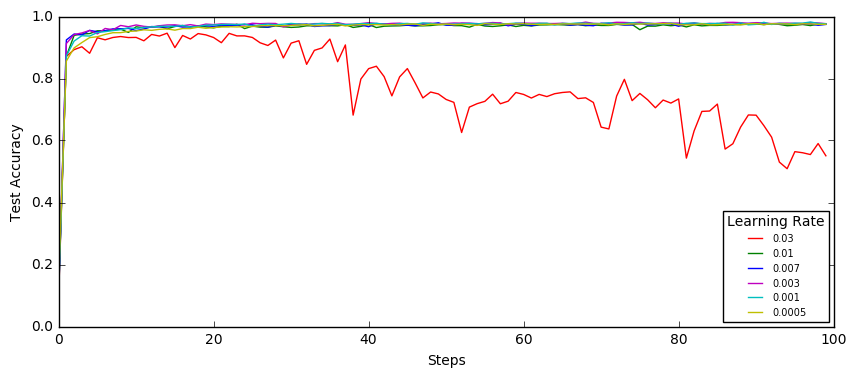

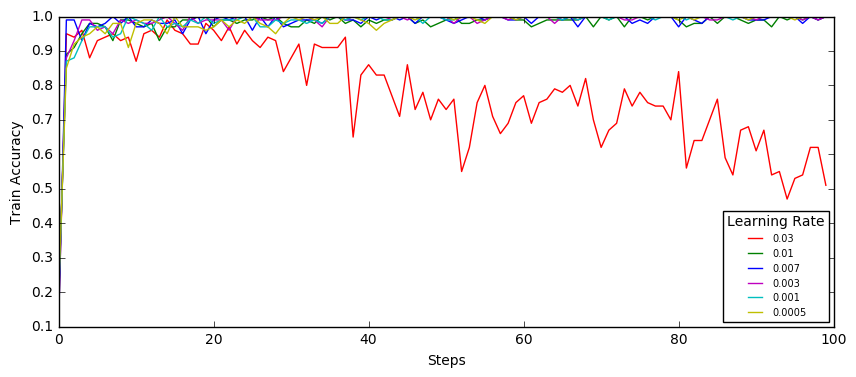

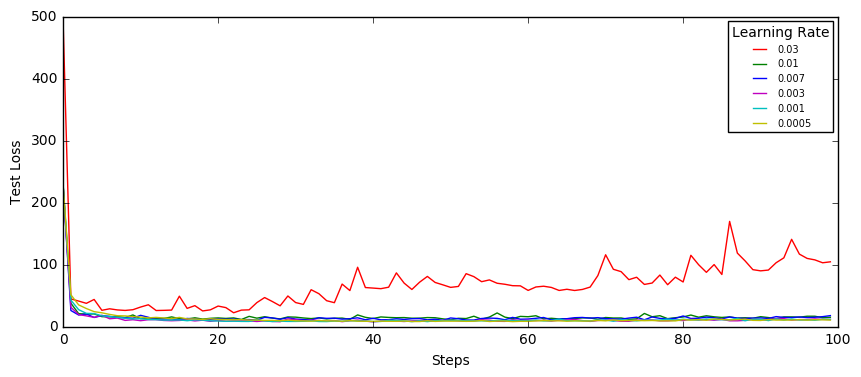

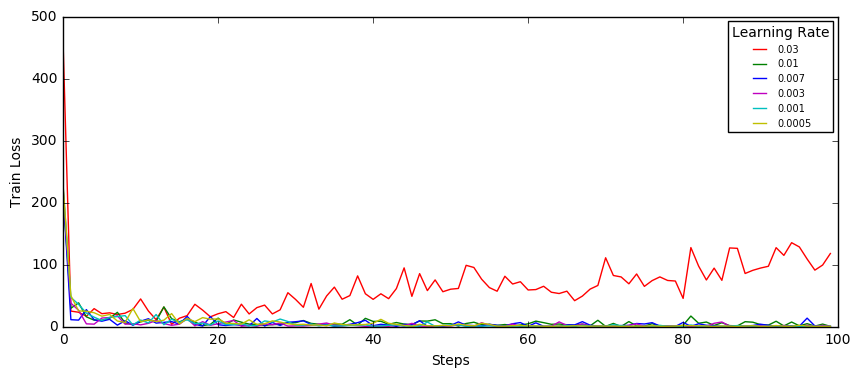

In [7]:
plot_performance(acc_check, LEARNING_RATES, train_accuracy, train_loss, test_accuracy, test_loss)

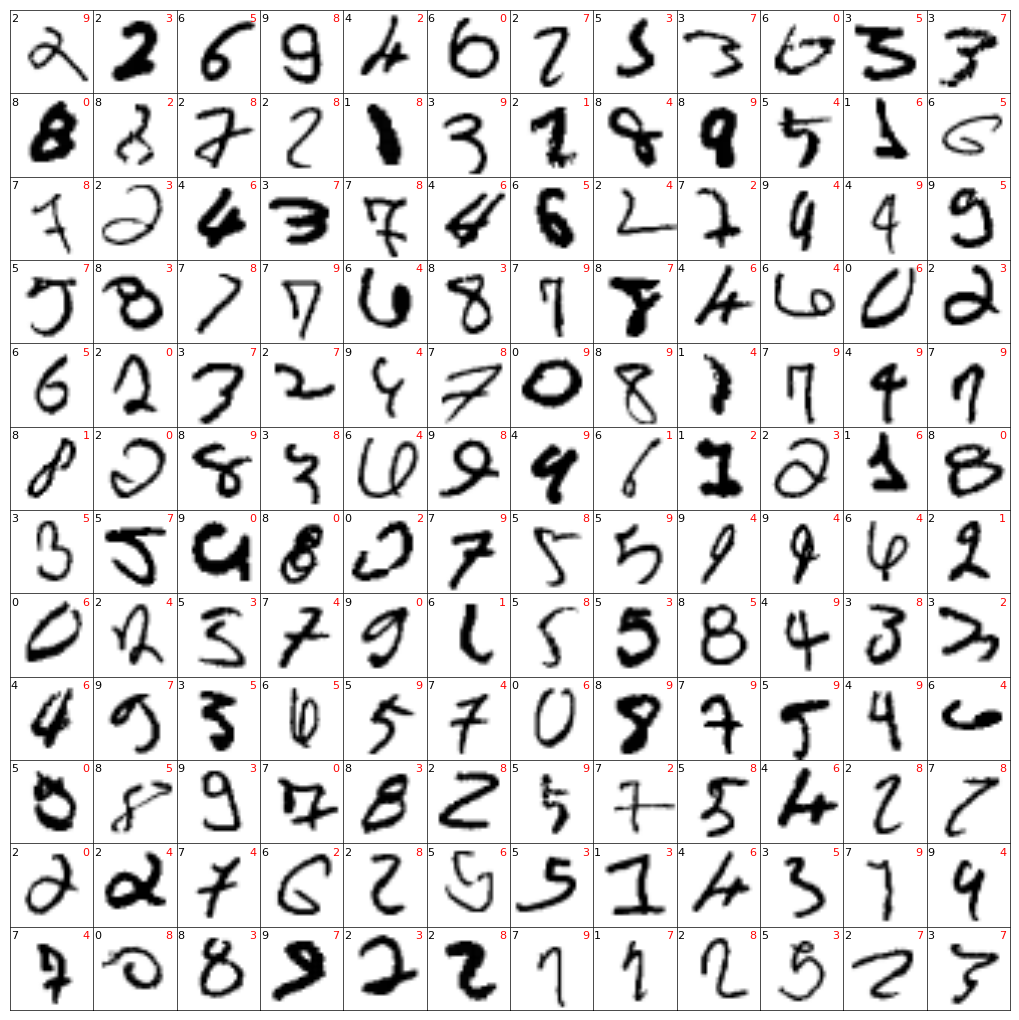

In [8]:
labels = np.argmax(mnist.test.labels, 1)
incorects = np.not_equal(labels, predictions)
plot_batch_images(mnist.test.images[incorects], labels[incorects], predictions[incorects], 144)